In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../Datasets/athlete_olympic_events-clean.csv', index_col=0)

df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


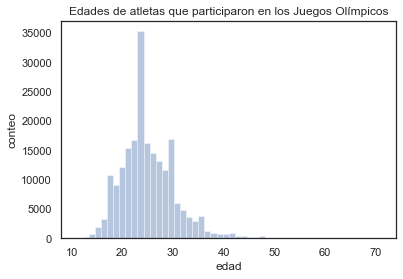

In [14]:
sns.set(style='white')
ax = sns.distplot(df['age'], kde=False, norm_hist=False)
ax.set_title('Edades de atletas que participaron en los Juegos Olímpicos');
ax.set(xlabel='edad', ylabel='conteo');

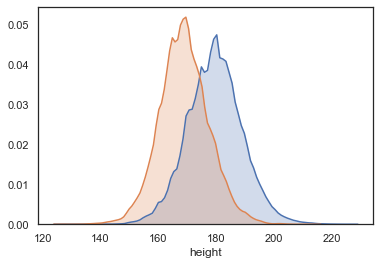

In [16]:
by_athlete = df.groupby(level=0)[['age', 'height', 'weight']].mean()
sex = df.groupby(level=0)['sex'].last()
merged = by_athlete.merge(sex, left_index=True, right_index=True)
males = by_athlete[merged['sex'] == 'M']
females = by_athlete[merged['sex'] == 'F']

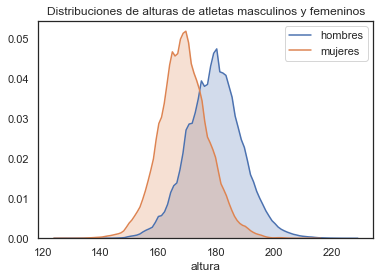

In [32]:
ax = sns.distplot(males['height'], hist=False, kde_kws = {'shade': True}, label='hombres')
sns.distplot(females['height'], hist=False, kde_kws = {'shade': True}, ax=ax, label='mujeres')
ax.set_title('Distribuciones de alturas de atletas masculinos y femeninos');
ax.set(xlabel='altura');
ax.legend(loc='upper right');

In [33]:
df['sport'].unique()

array(['Basketball', 'Judo', 'Speed Skating', 'Cross Country Skiing',
       'Ice Hockey', 'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Athletics', 'Alpine Skiing', 'Weightlifting', 'Wrestling', 'Luge',
       'Rowing', 'Bobsleigh', 'Swimming', 'Football', 'Equestrianism',
       'Shooting', 'Taekwondo', 'Boxing', 'Fencing', 'Diving', 'Canoeing',
       'Handball', 'Water Polo', 'Tennis', 'Cycling', 'Hockey',
       'Figure Skating', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Modern Pentathlon', 'Table Tennis',
       'Nordic Combined', 'Baseball', 'Rhythmic Gymnastics',
       'Freestyle Skiing', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Ski Jumping', 'Curling', 'Golf',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton', 'Rugby',
       'Tug-Of-War', 'Art Competitions', 'Lacrosse', 'Motorboating'],
      dtype=object)

In [36]:
df['sport'].isna().sum()

0

In [37]:
df['sport'].dtype

dtype('O')

In [39]:
sports = df['sport'].value_counts()

[Text(0.5, 0, '')]

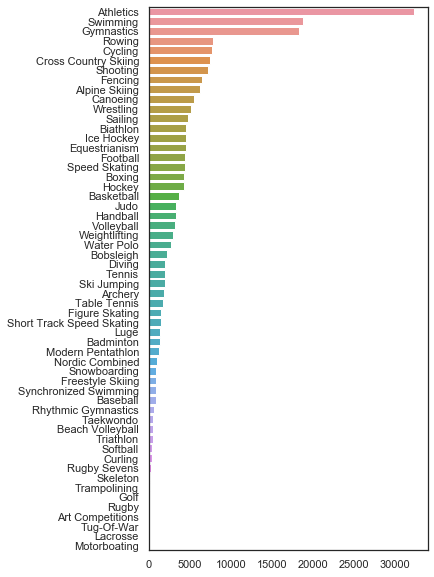

In [47]:
plt.figure(figsize=(5, 10))
ax = sns.barplot(sports, sports.index)
ax.set(xlabel='')

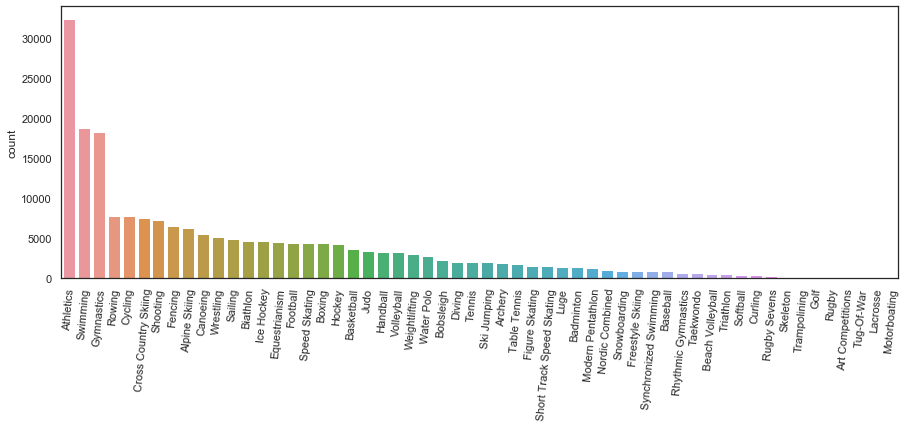

In [59]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(sports.index, sports)
ax.set(xlabel='', ylabel='count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=85);

In [60]:
df_2 = pd.read_json('../Datasets/zomato_reviews-clean.json')

In [61]:
df_2.head()

,has_online_delivery,price_range,currency,name,cuisines,location.address,location.city,user_rating.rating_text
0,1,3,Rs.,Hauz Khas Social,"Continental, American, Asian, North Indian","9-A & 12, Hauz Khas Village, New Delhi",New Delhi,Very Good
1,0,3,Rs.,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...","C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,Excellent
2,1,2,Rs.,The Hudson Cafe,"Cafe, Italian, Continental, Chinese","2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,Very Good
3,0,3,Rs.,Summer House Cafe,"Italian, Continental","1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,Very Good
4,0,3,Rs.,38 Barracks,"North Indian, Italian, Asian, American","M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,Very Good


In [62]:
df_2['user_rating.rating_text'].unique()

array(['Very Good', 'Excellent', 'Poor', 'Good', 'Average', 'Not rated'],
      dtype=object)

In [66]:
counts = df_2['user_rating.rating_text'].value_counts()

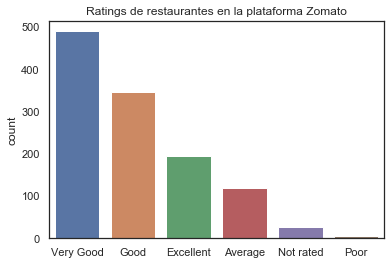

In [70]:
ax = sns.barplot(counts.index, counts)
ax.set_title('Ratings de restaurantes en la plataforma Zomato')
ax.set(ylabel='count');

In [74]:
counts

Very Good    490
Good         346
Excellent    194
Average      119
Not rated     26
Poor           5
Name: user_rating.rating_text, dtype: int64

In [76]:
as_percentage = counts * 100 / counts.sum()

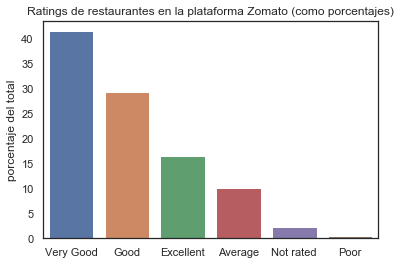

In [79]:
ax = sns.barplot(as_percentage.index, as_percentage)
ax.set_title('Ratings de restaurantes en la plataforma Zomato (como porcentajes)')
ax.set(ylabel='porcentaje del total');

In [84]:
df_2.head()

,has_online_delivery,price_range,currency,name,cuisines,location.address,location.city,user_rating.rating_text
0,1,3,Rs.,Hauz Khas Social,"Continental, American, Asian, North Indian","9-A & 12, Hauz Khas Village, New Delhi",New Delhi,Very Good
1,0,3,Rs.,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...","C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,Excellent
2,1,2,Rs.,The Hudson Cafe,"Cafe, Italian, Continental, Chinese","2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,Very Good
3,0,3,Rs.,Summer House Cafe,"Italian, Continental","1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,Very Good
4,0,3,Rs.,38 Barracks,"North Indian, Italian, Asian, American","M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,Very Good


In [93]:
crosstab = pd.crosstab(df_2['price_range'], df_2['user_rating.rating_text']).rename_axis('rating', axis=1).rename_axis('price range')

In [94]:
crosstab

rating,Average,Excellent,Good,Not rated,Poor,Very Good
price range,,,,,,
1,12,9,33,1,0,19
2,47,37,116,3,2,132
3,41,84,141,3,1,218
4,19,64,56,19,2,121


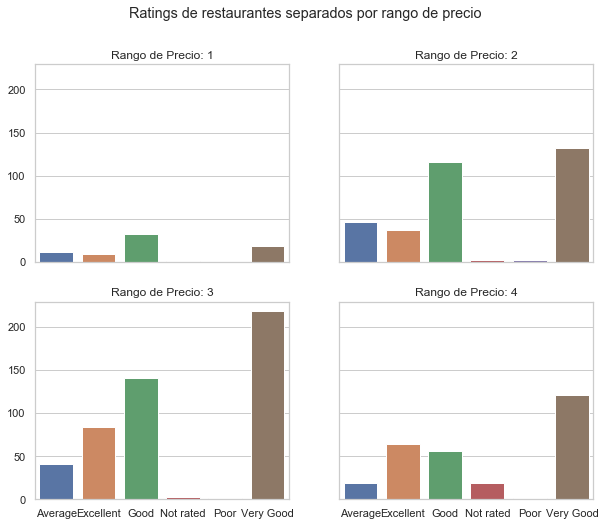

In [115]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
sns.barplot(crosstab.columns, crosstab.loc[1], ax=axs[0, 0])
sns.barplot(crosstab.columns, crosstab.loc[2], ax=axs[0, 1])
sns.barplot(crosstab.columns, crosstab.loc[3], ax=axs[1, 0])
sns.barplot(crosstab.columns, crosstab.loc[4], ax=axs[1, 1])
sns.set_style('whitegrid')

for i in axs:
    for ax in i:
        ax.set(xlabel='', ylabel='')
        
axs[0, 0].set_title('Rango de Precio: 1')
axs[0, 1].set_title('Rango de Precio: 2')
axs[1, 0].set_title('Rango de Precio: 3')
axs[1, 1].set_title('Rango de Precio: 4')
fig.suptitle('Ratings de restaurantes separados por rango de precio');

In [117]:
males

,age,height,weight
athlete_id,,,
1,24.0,180.0,80.0
2,23.0,170.0,60.0
6,32.0,188.0,75.0
7,32.0,183.0,72.0
9,26.0,186.0,96.0
...,...,...,...
135566,21.0,175.0,75.0
135567,26.0,183.0,72.0
135569,29.0,179.0,89.0


In [118]:
females

,age,height,weight
athlete_id,,,
5,24.333333,185.0,82.0
13,32.000000,159.0,55.5
14,32.000000,171.0,65.0
22,22.000000,170.0,125.0
26,17.000000,169.0,65.0
...,...,...,...
135550,27.000000,161.0,53.0
135553,25.800000,168.0,80.0
135560,36.000000,171.0,63.0


In [119]:
merged

,age,height,weight,sex
athlete_id,,,,
1,24.000000,180.0,80.0,M
2,23.000000,170.0,60.0,M
5,24.333333,185.0,82.0,F
6,32.000000,188.0,75.0,M
7,32.000000,183.0,72.0,M
...,...,...,...,...
135567,26.000000,183.0,72.0,M
135568,33.000000,171.0,69.0,F
135569,29.000000,179.0,89.0,M


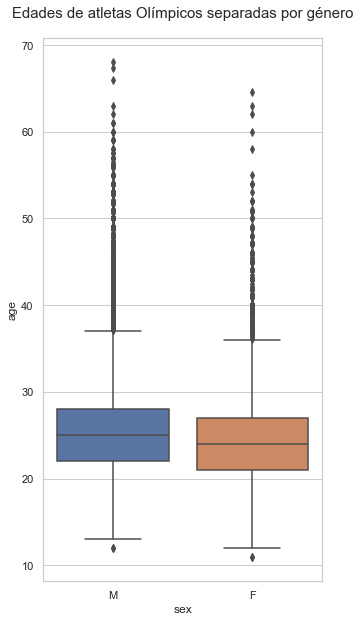

In [131]:
fig = plt.figure(figsize=(5, 10))
ax = sns.boxplot(x='sex', y='age', data=merged);
ax.set_title('Edades de atletas Olímpicos separadas por género', fontsize=15, pad=20);

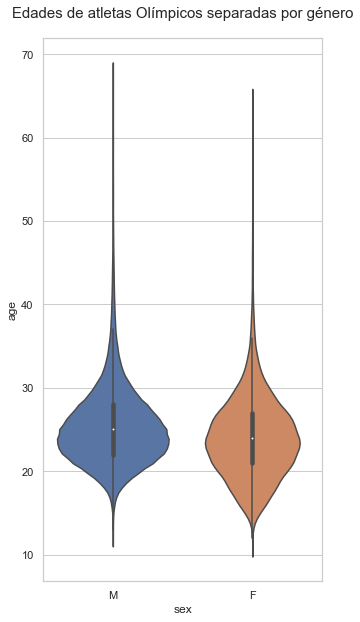

In [132]:
fig = plt.figure(figsize=(5, 10))
ax = sns.violinplot(x='sex', y='age', data=merged);
ax.set_title('Edades de atletas Olímpicos separadas por género', fontsize=15, pad=20);

In [134]:
df_2.to_json('../Datasets/zomato_reviews-clean.json')